In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/cop')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import re
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split 
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier 
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [ ]:
with open("indifinal.pickle","rb") as fr:
    indimath = pickle.load(fr)

In [ ]:
indimath

,date,title,content,files,Grade,text,numreply,numlikes,tokenized,list_token,reply_category
0,22.09.30,(동아출판 안병곤) 2단원 나눗셈 평가 자료입니다!,"2단원 나눗셈 단원 평가 자료입니다!\n단원평가부터 단원 시작 전 진단평가, 서술형...",첨부파일 4\n모두 받기\n(3-2-2)단원 평가.zip\n·899KB\n(3-2-...,3,동아출판 안병곤 2단원 나눗셈 평가 자료입니다 2단원 나눗셈 단원 평가 자료입니다단...,0.0,16.0,"[동아, 출판, 안병곤, 나눗셈, 평가, 자료, 나눗셈, 평가, 자료, 평가, 시작...","동아,출판,안병곤,나눗셈,평가,자료,나눗셈,평가,자료,평가,시작,진단,평가,서술,평...",0.0
1,22.09.30,2학기 2단원 나눗셈 카카오프렌즈(졸린곰선생님) 6-8차시,졸린곰 선생님 자료를 천재 교과서에 맞게 변경하였습니다~\n감사합니다.,첨부파일 3\n모두 받기\n2단원 6차시.pptx\n·42MB\n2단원 7차시.pp...,3,2학기 2단원 나눗셈 카카오 프렌즈 졸린 곰 선생님 68차시 졸린 곰 선생님 자료를...,0.0,12.0,"[나눗셈, 카카오, 프렌즈, 자료, 천재, 교과서, 변경, 다감]","나눗셈,카카오,프렌즈,자료,천재,교과서,변경,다감",0.0
2,22.09.30,[수학문어이야기] 3-2-2. 나눗셈 (7차시) (동아안병곤),-\n태그되어 있는 제 이름을 클릭하시면 제가 수학에서 올린자료를 한번에 보실 수 ...,첨부파일 1\n동아안 3-2-2-(7) 나머지가 있는 나눗셈을 할 수 있어요(2)_...,3,수학 문어 이야기 322 나눗셈 7차시 동아안병곤 태그 되어 있는 제 이름을 클릭하...,0.0,4.0,"[문어, 이야기, 나눗셈, 동아, 안병곤, 태그, 이름, 클릭, 자료, 그림, 캐릭...","문어,이야기,나눗셈,동아,안병곤,태그,이름,클릭,자료,그림,캐릭터,모든,자료,그린,...",0.0
3,22.09.29,[동아 안병곤] 곱셈 단원평가 자료입니다.,곱셈 단원 평가 자료입니다. 조금 늦은 듯 하지만 보충 지도를 위해 활용하시면 좋을...,첨부파일 1\n(3-2-1)단원 평가.zip\n·2MB,3,동아 안병곤 곱셈 단원평가 자료입니다 곱셈 단원 평가 자료입니다 조금 늦은 듯하지만...,0.0,4.0,"[동아, 안병곤, 곱셈, 평가, 자료, 곱셈, 평가, 자료, 보충, 지도, 활용, ...","동아,안병곤,곱셈,평가,자료,곱셈,평가,자료,보충,지도,활용,클래스,자료,출처",0.0
4,22.09.29,[천재 한대희]3-2-4 분수 도입게임,3-2-4 분수 단원도입 빙고게임입니다. 3-1-6 분수 복습 게임입니다.\n지도서...,첨부파일 2\n모두 받기\n(3-2-4)단원도입 분수 빙고게임.pptx\n·13MB...,3,천재 한대희 324 분수 도입 게임 324 분수 단원도 입 빙고게임입니다 316 분...,1.0,22.0,"[천재, 대희, 분수, 도입, 게임, 분수, 빙고게임, 분수, 복습, 게임, 지도서...","천재,대희,분수,도입,게임,분수,빙고게임,분수,복습,게임,지도서,게임,응용,화면,도...",1.0
...,...,...,...,...,...,...,...,...,...,...,...
29483,2016-08-05,제주대 시무식 강의평가 우수교수 등,제주대 시무식 강의평가 우수교수 등,첨부파일 3\n모두 받기\n구글트렌드 활용해 자료 분석하기.hwp\n·23KB\n빅...,5,제주대 시무식 강의평가 우수 교수 등 시상 제주대학교는 지난 2일 아라뮤즈홀에서 시...,3.0,54.0,"[제주, 시무, 강의, 평가, 우수, 교수, 시상, 제주대학교, 지난, 뮤즈, 무식...","제주,시무,강의,평가,우수,교수,시상,제주대학교,지난,뮤즈,무식,실시,향진,총장,신...",1.0
29484,2014-12-27,제주대 강의평가 우수교수 등 시상 제,제주대 강의평가 우수교수 등 시상 제,첨부파일 2\n모두 받기\n5차시_미세먼지 농도 그래프 그리기.hwp\n·18KB\...,5,제주대 강의평가 우수 교수 등 시상 제주대학교는 지난 2일 아라뮤즈홀에서 시무식을 ...,3.0,54.0,"[제주, 강의, 평가, 우수, 교수, 시상, 제주대학교, 지난, 뮤즈, 무식, 실시...","제주,강의,평가,우수,교수,시상,제주대학교,지난,뮤즈,무식,실시,향진,총장,신년사,...",1.0
29485,2013-01-06,인재개발관에 가면 공부도 하고 중국어,인재개발관에 가면 공부도 하고 중국어,첨부파일 3\n모두 받기\n6-8.pptx\n·9MB\n6-8 동기유발.mp4\n·...,5,인재 개발관에 가면 공부도 하고 중국어도 배운다 완주군이 지역 인재 육성을 위해 고...,1.0,18.0,"[인재, 개발, 가면, 공부, 중국어, 완주군, 지역, 인재, 육성, 고산면, 완공...","인재,개발,가면,공부,중국어,완주군,지역,인재,육성,고산면,완공,인재,개발,인재,스...",1.0
29486,2014-04-03,원광대학교 교원 보직 인사 대학원장,원광대학교 교원 보직 인사 대학원장,첨부파일 1\n꺾은선그래프 4차시.show\n·3MB,5,원광대학교 교원 보직 인사 대학원장 정진철 환경조경학과 교수교육대학원장 김용섭 수학...,7.0,126.0,"[원광, 대학교, 교원, 보직, 인사, 대학원, 정진철, 경조, 경학, 교수, 교육...","원광,대학교,교원,보직,인사,대학원,정진철,경조,경학,교수,교육대학,원장,김용섭,교...",0.0


In [ ]:
x = indimath['tokenized']
y = indimath['reply_category']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1234)

In [ ]:
model = gensim.models.Word2Vec(x, min_count= 10, size = 300, window= 4, sg= 1)

words = model.wv.syn0
print(len(words))

X_train_vect = np.array([np.array([model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([model.wv[i] for i in ls if i in words])
                         for ls in X_test])

X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(300, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(300, dtype=float))

<ipython-input-15-1e0f240cc592>:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  words = model.wv.syn0
<ipython-input-15-1e0f240cc592>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_train_vect = np.array([np.array([model.wv[i] for i in ls if i in words])


5840


<ipython-input-15-1e0f240cc592>:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_test_vect = np.array([np.array([model.wv[i] for i in ls if i in words])


In [ ]:
# classifier 
rf_clf = RandomForestClassifier(random_state=11, max_depth= 10, min_samples_leaf=3, min_samples_split=2)
lr_clf = LogisticRegression(C= 1000.0)
svm_clf =SVC(kernel = 'rbf', probability=True)
ridge_clf = RidgeClassifier()


# RandomForestClassifier 
rf_clf.fit(X_train_vect_avg , y_train)
rf_pred = rf_clf.predict(X_test_vect_avg)
print('#Random Forest train set score: {:.3f}'.format(rf_clf.score(X_train_vect_avg, y_train)))
print('#Random Forest test set score: {:.3f}'.format(rf_clf.score(X_test_vect_avg, y_test)))
print('#Random Forest accuracy:{0:.3f}'.format(accuracy_score(y_test, rf_pred)))
print('#Random Forest f1 : {0:.3f}'.format(f1_score(y_test , rf_pred)))
print( '-------------------------------------- ')


# LogisticRegression
lr_clf.fit(X_train_vect_avg , y_train)
lr_pred = lr_clf.predict(X_test_vect_avg)
print('#Logistic Regression train set score: {:.3f}'.format(lr_clf.score(X_train_vect_avg, y_train)))
print('#Logistic Regression test set score: {:.3f}'.format(lr_clf.score(X_test_vect_avg, y_test)))
print('#Logistic Regression accuracy: {0:.3f}'.format(accuracy_score(y_test, lr_pred)))
print('#Logistic Regression f1 : {0:.3f}'.format(f1_score(y_test , lr_pred)))
print( '-------------------------------------- ')


# support vector machine
svm_clf.fit(X_train_vect_avg , y_train)
svm_pred = svm_clf.predict(X_test_vect_avg)
print('#SVM Regression train set score: {:.3f}'.format(svm_clf.score(X_train_vect_avg, y_train)))
print('#SVM Regression test set score: {:.3f}'.format(svm_clf.score(X_test_vect_avg, y_test)))
print('#SVM Regression accuracy: {0:.3f}'.format(accuracy_score(y_test, svm_pred)))
print('#SVM Regression f1 : {0:.3f}'.format(f1_score(y_test , svm_pred)))
print( '-------------------------------------- ')



#Random Forest train set score: 0.659
#Random Forest test set score: 0.681
#Random Forest accuracy:0.681
#Random Forest f1 : 0.699
-------------------------------------- 
#Logistic Regression train set score:0.659
#Logistic Regression test set score: 0.681
#Logistic Regression accuracy: 0.681
#Logistic Regression f1 :0.699
-------------------------------------- 
#SVM Regression train set score: 0.674
#SVM Regression test set score:0.704
#SVM Regression accuracy: 0.704
#SVM Regression f1 : 0.720
-------------------------------------- 


In [ ]:
ridge_clf.fit(X_train_vect_avg, y_train) 
ridge_pred = ridge_clf.predict(X_test_vect_avg)

print('#Ridge Regression train set score: {:.3f}'.format(ridge_clf.score(X_train_vect_avg, y_train)))
print('#Ridge Regression test set score: {:.3f}'.format(ridge_clf.score(X_test_vect_avg, y_test)))
print('#Ridge Regression accuracy: {0:.4f}'.format(accuracy_score(y_test, ridge_pred)))
print('#Ridge Regression f1 : {0:.3f}'.format(f1_score(y_test , ridge_pred)))
print( '-------------------------------------- ')


#Ridge Regression train set score: 0.674
#Ridge Regression test set score: 0.684
#Ridge Regression accuracy: 0.6841
#Ridge Regression f1 : 0.710
-------------------------------------- 


In [8]:

lr_clf = LogisticRegression()
svm_clf =SVC(kernel = 'rbf', probability=True)
ridge_clf = RidgeClassifier()


print( '------------------ Logistic -------------------- ')
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

f1 = make_scorer(f1_score , average='macro')

grid_lrclf = GridSearchCV(lr_clf , grid , scoring=f1 , cv=5)
grid_lrclf.fit(X_train_vect_avg , y_train)

print('GridSearchCV best parameter in Logistic :',grid_lrclf.best_params_)
print('GridSearchCV best f1 score : {0:.4f}'.format(grid_lrclf.best_score_))
best_lfclf = grid_lrclf.best_estimator_
dpredictions = best_lfclf.predict(X_test_vect_avg)
f1 = f1_score(y_test , dpredictions)
print('test Logistic t f1 : {0:.4f}'.format(f1))
print( '----------------------------------------- ')



print( '------------------ Ridge -------------------- ')
parameters = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}

f1 = make_scorer(f1_score , average='macro')

grid_ridclf = GridSearchCV(ridge_clf , grid , scoring=f1 , cv=5)
grid_ridclf.fit(X_train_vect_avg , y_train)

print('GridSearchCV best parameter in Ridge :',grid_ridclf.best_params_)
print('GridSearchCV best f1 score : {0:.4f}'.format(grid_ridclf.best_score_))
best_ridfclf = grid_ridclf.best_estimator_
dpredictions = best_ridfclf.predict(X_test_vect_avg)
f1 = f1_score(y_test , dpredictions)
print('test Ridge f1 : {0:.4f}'.format(f1))
print( '-------------------------------------- ')



print( '------------------ svm -------------------- ')
f1 = make_scorer(f1_score , average='macro')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

grid_svmclf = GridSearchCV(svm_clf , param_grid=parameters , scoring=f1 , cv=5)
grid_svmclf.fit(X_train_vect_avg , y_train)

print('GridSearchCV best parameter in svm :',grid_svmclf.best_params_)
print('GridSearchCV best f1 score : {0:.4f}'.format(grid_svmclf.best_score_))
best_svmclf = grid_svmclf.best_estimator_
dpredictions = best_svmclf.predict(X_test_vect_avg)
f1 = f1_score(y_test , dpredictions)
print('test svm f1 : {0:.4f}'.format(f1))
print( '-------------------------------------- ')


------------------ Logistic -------------------- 
GridSearchCV best parameter in Logistic : {'C': 0.001, 'penalty': 'l2'}
GridSearchCV best f1 score : {0:.4f} : 0.7204
test Logistic t f1 : 0.7107
----------------------------------------- 
------------------ Ridge -------------------- 
GridSearchCV best parameter in Ridge : {'alpha': 1 }
GridSearchCV best f1 score : 0.7204
test Ridge f1 : 0.7163
-------------------------------------- 
------------------ svm -------------------- 
GridSearchCV best parameter in svm : {'C' : 10, 'gamma': 0.01}
GridSearchCV best f1 score : 0.7631
test svm f1 : 0.7520
-------------------------------------- 


#Kobert embedding and classification

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3 
!pip install torch

!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

device = torch.device("cuda:0")

bertmodel, vocab = get_pytorch_kobert_model()

using cached model. /content/gdrive/MyDrive/Colab Notebooks/cop/.cache/kobert_v1.zip
using cached model. /content/gdrive/MyDrive/Colab Notebooks/cop/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))


using cached model. /content/gdrive/MyDrive/Colab Notebooks/cop/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
indimath['reply_category']= indimath['reply_category'].astype(int)

In [ ]:
data_list = []
for q, label in zip(indimath['text'], indimath['reply_category'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(data_list, test_size=0.2, shuffle=True, random_state=34)
dataset_train, dataset_val = train_test_split(dataset_train, test_size=0.2, shuffle=True, random_state=34)


In [ ]:
data_test = BERTDataset(data_list, 0, 1, tok, max_len, True, False)
dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_val = BERTDataset(dataset_val, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
data_train

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,  # change class size {'0','1','2','3'}
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate            
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)


In [ ]:
## Setting parameters
max_len = 512
batch_size = 16
warmup_ratio = 0.1
num_epochs = 3
max_grad_norm = 1
log_interval = 200
learning_rate =  1e-5

In [ ]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)


In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    val_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(val_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        val_acc += calc_accuracy(out, label)
    print("epoch {} val acc {}".format(e+1, val_acc / (batch_id+1)))
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))


  0%|          | 1/2359 [00:01<40:54,  1.04s/it]

epoch 1 batch id 1 loss 0.4873751997947693 train acc 0.875


  9%|▊         | 201/2359 [02:30<26:43,  1.35it/s]

epoch 1 batch id 201 loss 0.4823119640350342 train acc 0.753731343283582


 17%|█▋        | 401/2359 [04:59<24:19,  1.34it/s]

epoch 1 batch id 401 loss 0.6490050554275513 train acc 0.7459476309226932


 25%|██▌       | 601/2359 [07:27<21:42,  1.35it/s]

epoch 1 batch id 601 loss 0.598297119140625 train acc 0.75


 34%|███▍      | 801/2359 [09:56<19:22,  1.34it/s]

epoch 1 batch id 801 loss 0.47646158933639526 train acc 0.7496878901373284


 42%|████▏     | 1001/2359 [12:25<16:47,  1.35it/s]

epoch 1 batch id 1001 loss 0.15621842443943024 train acc 0.7532467532467533


 51%|█████     | 1201/2359 [14:53<14:21,  1.34it/s]

epoch 1 batch id 1201 loss 0.34113070368766785 train acc 0.7526019983347211


 59%|█████▉    | 1401/2359 [17:22<11:50,  1.35it/s]

epoch 1 batch id 1401 loss 0.19426074624061584 train acc 0.7540149892933619


 68%|██████▊   | 1601/2359 [19:51<09:21,  1.35it/s]

epoch 1 batch id 1601 loss 0.5658798217773438 train acc 0.7532792004996877


 76%|███████▋  | 1801/2359 [22:19<06:54,  1.35it/s]

epoch 1 batch id 1801 loss 0.47296831011772156 train acc 0.7552054414214325


 85%|████████▍ | 2001/2359 [24:48<04:27,  1.34it/s]

epoch 1 batch id 2001 loss 0.24522872269153595 train acc 0.757808595702149


 93%|█████████▎| 2201/2359 [27:17<01:57,  1.35it/s]

epoch 1 batch id 2201 loss 0.5527897477149963 train acc 0.7564743298500681


100%|██████████| 2359/2359 [29:14<00:00,  1.34it/s]


epoch 1 train acc 0.7563056379821959


100%|██████████| 590/590 [02:30<00:00,  3.93it/s]


epoch 1 val acc 0.7386299435028248


100%|██████████| 738/738 [03:07<00:00,  3.93it/s]


epoch 1 test acc 0.7562669376693767


  0%|          | 1/2359 [00:01<41:01,  1.04s/it]

epoch 2 batch id 1 loss 0.4757758378982544 train acc 0.75


  9%|▊         | 201/2359 [02:29<26:46,  1.34it/s]

epoch 2 batch id 201 loss 0.40804365277290344 train acc 0.7580845771144279


 17%|█▋        | 401/2359 [04:58<24:16,  1.34it/s]

epoch 2 batch id 401 loss 0.6064369678497314 train acc 0.7528054862842892


 25%|██▌       | 601/2359 [07:27<21:45,  1.35it/s]

epoch 2 batch id 601 loss 0.7139410376548767 train acc 0.7589434276206323


 34%|███▍      | 801/2359 [09:56<19:23,  1.34it/s]

epoch 2 batch id 801 loss 0.5388011932373047 train acc 0.7596754057428214


 42%|████▏     | 1001/2359 [12:25<16:46,  1.35it/s]

epoch 2 batch id 1001 loss 0.23129433393478394 train acc 0.761988011988012


 51%|█████     | 1201/2359 [14:53<14:22,  1.34it/s]

epoch 2 batch id 1201 loss 0.31855180859565735 train acc 0.7620732722731057


 59%|█████▉    | 1401/2359 [17:22<11:51,  1.35it/s]

epoch 2 batch id 1401 loss 0.21736685931682587 train acc 0.7624018558172734


 68%|██████▊   | 1601/2359 [19:51<09:23,  1.35it/s]

epoch 2 batch id 1601 loss 0.4524751901626587 train acc 0.764053716427233


 76%|███████▋  | 1801/2359 [22:19<06:54,  1.35it/s]

epoch 2 batch id 1801 loss 0.4814135432243347 train acc 0.7649916712937257


 85%|████████▍ | 2001/2359 [24:48<04:26,  1.34it/s]

epoch 2 batch id 2001 loss 0.24967841804027557 train acc 0.7680534732633684


 93%|█████████▎| 2201/2359 [27:17<01:57,  1.35it/s]

epoch 2 batch id 2201 loss 0.780627965927124 train acc 0.7677760109041345


100%|██████████| 2359/2359 [29:15<00:00,  1.34it/s]


epoch 2 train acc 0.7676451886392539


100%|██████████| 590/590 [02:30<00:00,  3.93it/s]


epoch 2 val acc 0.7589689265536723


100%|██████████| 738/738 [03:08<00:00,  3.92it/s]


epoch 2 test acc 0.7704945799457995


  0%|          | 1/2359 [00:00<39:13,  1.00it/s]

epoch 3 batch id 1 loss 0.359561026096344 train acc 0.875


  9%|▊         | 201/2359 [02:29<26:43,  1.35it/s]

epoch 3 batch id 201 loss 0.5850202441215515 train acc 0.7686567164179104


 17%|█▋        | 401/2359 [04:58<24:09,  1.35it/s]

epoch 3 batch id 401 loss 0.16233375668525696 train acc 0.7674563591022444


 25%|██▌       | 601/2359 [07:28<21:45,  1.35it/s]

epoch 3 batch id 601 loss 0.8145666718482971 train acc 0.7687188019966722


 34%|███▍      | 801/2359 [09:56<19:26,  1.34it/s]

epoch 3 batch id 801 loss 0.3718448877334595 train acc 0.7702871410736579


 42%|████▏     | 1001/2359 [12:26<16:47,  1.35it/s]

epoch 3 batch id 1001 loss 0.22965560853481293 train acc 0.7736013986013986


 51%|█████     | 1201/2359 [14:55<14:22,  1.34it/s]

epoch 3 batch id 1201 loss 0.2650386393070221 train acc 0.7722731057452124


 59%|█████▉    | 1401/2359 [17:24<11:50,  1.35it/s]

epoch 3 batch id 1401 loss 0.21978427469730377 train acc 0.7716809421841542


 68%|██████▊   | 1601/2359 [19:53<09:23,  1.35it/s]

epoch 3 batch id 1601 loss 0.5124690532684326 train acc 0.7725640224859462


 76%|███████▋  | 1801/2359 [22:22<06:55,  1.34it/s]

epoch 3 batch id 1801 loss 0.4253244698047638 train acc 0.7716546363131593


 85%|████████▍ | 2001/2359 [24:50<04:27,  1.34it/s]

epoch 3 batch id 2001 loss 0.2212035059928894 train acc 0.7736131934032984


 93%|█████████▎| 2201/2359 [27:19<01:57,  1.35it/s]

epoch 3 batch id 2201 loss 0.6532238721847534 train acc 0.7725465697410268


100%|██████████| 2359/2359 [29:16<00:00,  1.34it/s]


epoch 3 train acc 0.7723611699872828


100%|██████████| 590/590 [02:29<00:00,  3.94it/s]


epoch 3 val acc 0.7511299435028249


100%|██████████| 738/738 [03:08<00:00,  3.92it/s]

epoch 3 test acc 0.7598238482384824


In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    val_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(val_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        val_acc += calc_accuracy(out, label)
    print("epoch {} val acc {}".format(e+1, val_acc / (batch_id+1)))
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))


  0%|          | 1/2359 [00:01<1:12:10,  1.84s/it]

epoch 1 batch id 1 loss 0.6688973307609558 train acc 0.5


  9%|▊         | 201/2359 [02:22<25:28,  1.41it/s]

epoch 1 batch id 201 loss 0.7691953778266907 train acc 0.6200248756218906


 17%|█▋        | 401/2359 [04:45<23:23,  1.40it/s]

epoch 1 batch id 401 loss 0.4682868719100952 train acc 0.6343516209476309


 25%|██▌       | 601/2359 [07:08<20:47,  1.41it/s]

epoch 1 batch id 601 loss 0.6916184425354004 train acc 0.6507903494176372


 34%|███▍      | 801/2359 [09:31<18:40,  1.39it/s]

epoch 1 batch id 801 loss 0.5742694735527039 train acc 0.6585518102372035


 42%|████▏     | 1001/2359 [11:54<16:13,  1.40it/s]

epoch 1 batch id 1001 loss 0.4651392102241516 train acc 0.6634615384615384


 51%|█████     | 1201/2359 [14:17<13:47,  1.40it/s]

epoch 1 batch id 1201 loss 0.41570425033569336 train acc 0.6652789342214821


 59%|█████▉    | 1401/2359 [16:40<11:23,  1.40it/s]

epoch 1 batch id 1401 loss 0.7902235388755798 train acc 0.670146324054247


 68%|██████▊   | 1601/2359 [19:03<09:01,  1.40it/s]

epoch 1 batch id 1601 loss 0.4917345643043518 train acc 0.6771549031855091


 76%|███████▋  | 1801/2359 [21:25<06:38,  1.40it/s]

epoch 1 batch id 1801 loss 0.44863927364349365 train acc 0.6858689616879511


 85%|████████▍ | 2001/2359 [23:49<04:16,  1.40it/s]

epoch 1 batch id 2001 loss 0.32389363646507263 train acc 0.6942778610694653


 93%|█████████▎| 2201/2359 [26:11<01:52,  1.40it/s]

epoch 1 batch id 2201 loss 0.5665483474731445 train acc 0.6984893230349841


100%|██████████| 2359/2359 [28:04<00:00,  1.40it/s]


epoch 1 train acc 0.7016744383213226


100%|██████████| 590/590 [02:22<00:00,  4.13it/s]


epoch 1 val acc 0.7393361581920903


100%|██████████| 738/738 [02:58<00:00,  4.13it/s]


epoch 1 test acc 0.7447493224932249


  0%|          | 1/2359 [00:00<36:05,  1.09it/s]

epoch 2 batch id 1 loss 0.5751675963401794 train acc 0.625


  9%|▊         | 201/2359 [02:24<25:44,  1.40it/s]

epoch 2 batch id 201 loss 0.3932698667049408 train acc 0.7263681592039801


 17%|█▋        | 401/2359 [04:46<23:22,  1.40it/s]

epoch 2 batch id 401 loss 0.6633642911911011 train acc 0.7350374064837906


 25%|██▌       | 601/2359 [07:10<20:53,  1.40it/s]

epoch 2 batch id 601 loss 0.6553663015365601 train acc 0.7439683860232945


 34%|███▍      | 801/2359 [09:33<18:37,  1.39it/s]

epoch 2 batch id 801 loss 0.5631160140037537 train acc 0.7454744069912609


 42%|████▏     | 1001/2359 [11:56<16:09,  1.40it/s]

epoch 2 batch id 1001 loss 0.18791767954826355 train acc 0.7497502497502497


 51%|█████     | 1201/2359 [14:19<13:48,  1.40it/s]

epoch 2 batch id 1201 loss 0.4414369761943817 train acc 0.7493755203996669


 59%|█████▉    | 1401/2359 [16:42<11:21,  1.41it/s]

epoch 2 batch id 1401 loss 0.2817704975605011 train acc 0.7508922198429693


 68%|██████▊   | 1601/2359 [19:05<09:01,  1.40it/s]

epoch 2 batch id 1601 loss 0.5917366743087769 train acc 0.7503903810118676


 76%|███████▋  | 1801/2359 [21:28<06:38,  1.40it/s]

epoch 2 batch id 1801 loss 0.39683011174201965 train acc 0.7524292059966685


 85%|████████▍ | 2001/2359 [23:51<04:16,  1.39it/s]

epoch 2 batch id 2001 loss 0.3304728865623474 train acc 0.75555972013993


 93%|█████████▎| 2201/2359 [26:14<01:53,  1.40it/s]

epoch 2 batch id 2201 loss 0.6457557082176208 train acc 0.7556224443434802


100%|██████████| 2359/2359 [28:07<00:00,  1.40it/s]


epoch 2 train acc 0.7555108096651123


100%|██████████| 590/590 [02:23<00:00,  4.13it/s]


epoch 2 val acc 0.7534604519774012


100%|██████████| 738/738 [02:58<00:00,  4.13it/s]


epoch 2 test acc 0.7640582655826558


  0%|          | 1/2359 [00:00<36:32,  1.08it/s]

epoch 3 batch id 1 loss 0.6807453632354736 train acc 0.625


  9%|▊         | 201/2359 [02:24<25:44,  1.40it/s]

epoch 3 batch id 201 loss 0.4563603699207306 train acc 0.7456467661691543


 17%|█▋        | 401/2359 [04:46<23:19,  1.40it/s]

epoch 3 batch id 401 loss 0.7492997646331787 train acc 0.7468827930174564


 25%|██▌       | 601/2359 [07:10<20:56,  1.40it/s]

epoch 3 batch id 601 loss 0.6527513861656189 train acc 0.7497920133111481


 34%|███▍      | 801/2359 [09:32<18:36,  1.40it/s]

epoch 3 batch id 801 loss 0.5160160064697266 train acc 0.7545255930087391


 42%|████▏     | 1001/2359 [11:55<16:13,  1.39it/s]

epoch 3 batch id 1001 loss 0.26789531111717224 train acc 0.7586163836163836


 51%|█████     | 1201/2359 [14:18<13:47,  1.40it/s]

epoch 3 batch id 1201 loss 0.31600821018218994 train acc 0.7574937552039966


 59%|█████▉    | 1401/2359 [16:41<11:22,  1.40it/s]

epoch 3 batch id 1401 loss 0.2218250036239624 train acc 0.7572269807280514


 68%|██████▊   | 1601/2359 [19:04<09:01,  1.40it/s]

epoch 3 batch id 1601 loss 0.5497021675109863 train acc 0.7581980012492192


 76%|███████▋  | 1801/2359 [21:27<06:38,  1.40it/s]

epoch 3 batch id 1801 loss 0.4404263496398926 train acc 0.7602720710716269


 85%|████████▍ | 2001/2359 [23:50<04:17,  1.39it/s]

epoch 3 batch id 2001 loss 0.2854260206222534 train acc 0.7624937531234383


 93%|█████████▎| 2201/2359 [26:13<01:52,  1.41it/s]

epoch 3 batch id 2201 loss 0.6269187331199646 train acc 0.7624375283961835


100%|██████████| 2359/2359 [28:06<00:00,  1.40it/s]


epoch 3 train acc 0.7626642645188639


100%|██████████| 590/590 [02:22<00:00,  4.13it/s]


epoch 3 val acc 0.7513418079096046


100%|██████████| 738/738 [02:58<00:00,  4.14it/s]


epoch 3 test acc 0.7664295392953929


  0%|          | 1/2359 [00:00<36:35,  1.07it/s]

epoch 4 batch id 1 loss 0.4445200562477112 train acc 0.875


  9%|▊         | 201/2359 [02:23<25:42,  1.40it/s]

epoch 4 batch id 201 loss 0.32116085290908813 train acc 0.7649253731343284


 17%|█▋        | 401/2359 [04:46<23:19,  1.40it/s]

epoch 4 batch id 401 loss 0.8012641072273254 train acc 0.7627805486284289


 25%|██▌       | 601/2359 [07:09<20:54,  1.40it/s]

epoch 4 batch id 601 loss 0.5715732574462891 train acc 0.7635191347753744


 34%|███▍      | 801/2359 [09:32<18:34,  1.40it/s]

epoch 4 batch id 801 loss 0.40335142612457275 train acc 0.7651373283395755


 42%|████▏     | 1001/2359 [11:55<16:08,  1.40it/s]

epoch 4 batch id 1001 loss 0.2124195098876953 train acc 0.7692307692307693


 51%|█████     | 1201/2359 [14:18<13:50,  1.39it/s]

epoch 4 batch id 1201 loss 0.3500768542289734 train acc 0.7672772689425479


 59%|█████▉    | 1401/2359 [16:41<11:23,  1.40it/s]

epoch 4 batch id 1401 loss 0.2232925295829773 train acc 0.7675767309064954


 68%|██████▊   | 1601/2359 [19:04<09:00,  1.40it/s]

epoch 4 batch id 1601 loss 0.42359238862991333 train acc 0.7705340412242349


 76%|███████▋  | 1801/2359 [21:27<06:38,  1.40it/s]

epoch 4 batch id 1801 loss 0.4814428985118866 train acc 0.7715852304275402


 85%|████████▍ | 2001/2359 [23:50<04:17,  1.39it/s]

epoch 4 batch id 2001 loss 0.19355183839797974 train acc 0.7733008495752124


 93%|█████████▎| 2201/2359 [26:13<01:52,  1.40it/s]

epoch 4 batch id 2201 loss 0.7743948698043823 train acc 0.7740231712857792


100%|██████████| 2359/2359 [28:06<00:00,  1.40it/s]


epoch 4 train acc 0.7748516320474778


100%|██████████| 590/590 [02:23<00:00,  4.13it/s]


epoch 4 val acc 0.7403248587570622


100%|██████████| 738/738 [02:58<00:00,  4.12it/s]


epoch 4 test acc 0.7569444444444444


  0%|          | 1/2359 [00:00<36:37,  1.07it/s]

epoch 5 batch id 1 loss 0.5413323044776917 train acc 0.75


  9%|▊         | 201/2359 [02:24<25:42,  1.40it/s]

epoch 5 batch id 201 loss 0.46237531304359436 train acc 0.7804726368159204


 17%|█▋        | 401/2359 [04:46<23:20,  1.40it/s]

epoch 5 batch id 401 loss 0.6820467114448547 train acc 0.7814837905236908


 25%|██▌       | 601/2359 [07:10<20:54,  1.40it/s]

epoch 5 batch id 601 loss 0.8161017298698425 train acc 0.778910149750416


 34%|███▍      | 801/2359 [09:33<18:40,  1.39it/s]

epoch 5 batch id 801 loss 0.26254135370254517 train acc 0.7773096129837703


 42%|████▏     | 1001/2359 [11:56<16:13,  1.39it/s]

epoch 5 batch id 1001 loss 0.2039761245250702 train acc 0.7804695304695305


 51%|█████     | 1201/2359 [14:19<13:47,  1.40it/s]

epoch 5 batch id 1201 loss 0.2311185747385025 train acc 0.7793505412156536


 59%|█████▉    | 1401/2359 [16:42<11:26,  1.40it/s]

epoch 5 batch id 1401 loss 0.20170021057128906 train acc 0.778283369022127


 68%|██████▊   | 1601/2359 [19:05<09:01,  1.40it/s]

epoch 5 batch id 1601 loss 0.38777315616607666 train acc 0.7804497189256715


 76%|███████▋  | 1801/2359 [21:28<06:38,  1.40it/s]

epoch 5 batch id 1801 loss 0.4783456027507782 train acc 0.7813020544142143


 85%|████████▍ | 2001/2359 [23:51<04:17,  1.39it/s]

epoch 5 batch id 2001 loss 0.1388564258813858 train acc 0.7817341329335332


 93%|█████████▎| 2201/2359 [26:14<01:52,  1.40it/s]

epoch 5 batch id 2201 loss 0.7910679578781128 train acc 0.7837914584279873


100%|██████████| 2359/2359 [28:08<00:00,  1.40it/s]


epoch 5 train acc 0.7851844001695634


100%|██████████| 590/590 [02:23<00:00,  4.12it/s]


epoch 5 val acc 0.7413841807909605


100%|██████████| 738/738 [02:58<00:00,  4.13it/s]

epoch 5 test acc 0.7552506775067751


In [ ]:
#torch.save(model, 'kobertmodel.pt')  

#torch.save(model.state_dict(), 'kobertmodel_state_dict.pt')  

#torch.save({
#    'model': model.state_dict(),
#    'optimizer': optimizer.state_dict()
#}, 'kobertmodel.tar')  # 


In [ ]:
model.load_state_dict(torch.load("kobertmodel_state_dict.pt"))

<All keys matched successfully>

In [ ]:

checkpoint = torch.load('kobertmodel.tar')   
model.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])

In [ ]:
model1 = torch.load('kobertmodel.pt')  
model1.load_state_dict(torch.load('kobertmodel_state_dict.pt'))  

checkpoint = torch.load('kobertmodel.tar')  
model1.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:

from tqdm import tqdm, tqdm_notebook

predictions =[]
with torch.no_grad():
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
    token_ids = token_ids.long().cuda()
    segment_ids = segment_ids.long().cuda()
    valid_length= valid_length
    label = label.long().cuda()
    out = model(token_ids, valid_length, segment_ids)
    _, max_indices = torch.max(out, 1)

    predictions.extend(max_indices.squeeze(0).detach().cpu().numpy())



In [ ]:
true_labels =[]
with torch.no_grad():
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        true_labels.extend(label.squeeze(0).detach().cpu().numpy())

In [1]:
from sklearn.metrics import f1_score

f1 = f1_score(true_labels, predictions, average='macro')
print(f1)

f1 = f1_score(true_labels, predictions, average='micro')
print(f1)

0.7729309228038384
0.7565276364869449


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


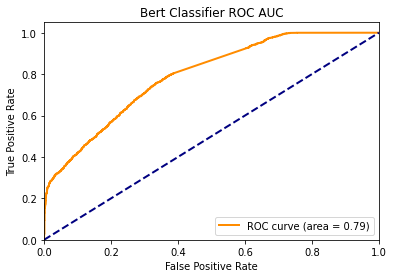

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# get the predicted probabilities
predicted_probs = kobert_predict(model, test_dataloader)

# get the true labels
y_true = []
for _, _, _, label in test_dataloader:
    y_true.extend(label.tolist())

# calculate the fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_true, predicted_probs[:, 1])
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bert Classifier ROC AUC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def kobert_predict(model, data):
    """Perform a forward pass on the trained KoBERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_cls_embeddings = []

    # For each batch in our test set...
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(data):
        # Load batch to GPU
        token_ids = token_ids.long().cuda()
        segment_ids = segment_ids.long().cuda()
        valid_length = valid_length.cuda()
        label = label.long().cuda()

        # Compute  cls_embeddings
        with torch.no_grad():
            encoded_layers = model(token_ids, valid_length, segment_ids)
            cls_embeddings = encoded_layers[-1][:, 0, :]
            all_cls_embeddings.append(cls_embeddings)

    cls_embeddings = torch.cat(all_cls_embeddings, dim=0)
    cls_embeddings_matrix = cls_embeddings.detach().cpu().numpy()

    return  cls_embeddings_matrix

In [ ]:
from gensim.matutils import corpus2dense

# Create separate datasets for each label
data_test_0 = [data for data in data_list if data[1] == 0]
data_test_1 = [data for data in data_list if data[1] == 1]

# Create dataloaders for each dataset
dataloader_0 = torch.utils.data.DataLoader(BERTDataset(data_test_0, 0, 1, tok, max_len, True, False), batch_size=batch_size, num_workers=5)
dataloader_1 = torch.utils.data.DataLoader(BERTDataset(data_test_1, 0, 1, tok, max_len, True, False), batch_size=batch_size, num_workers=5)

low_cls_embeddings = kobert_predict(model, dataloader_0)

high_cls_embeddings = kobert_predict(model, dataloader_1)


In [ ]:
# save and compress.
with open('low_cls_embeddings.pickle', 'wb') as f:
    pickle.dump(low_cls_embeddings, f)

with open('high_cls_embeddings.pickle', 'wb') as f:
    pickle.dump(high_cls_embeddings, f)